<div class="output_png output_subarea output_execute_result">
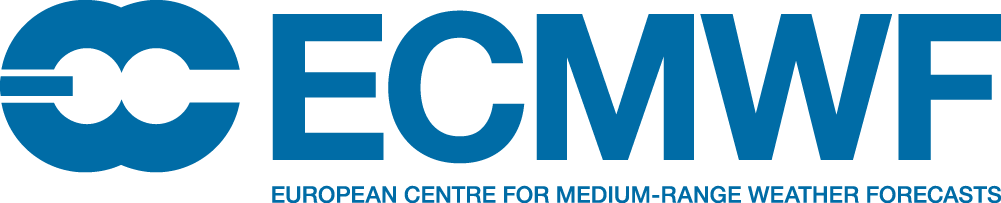
</div>

# 	MUCAPE and MUCIN

This notebook will provide you guidance how to explore ECMWF data to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://charts.ecmwf.int/products/medium-cape-cin  


<div class="output_png output_subarea output_execute_result">
<center>
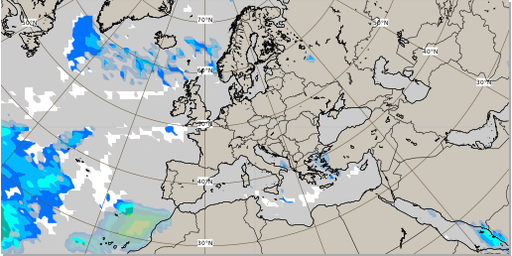</center>
</div>

Some ECMWF real-time products are governed by the [ECMWF Standard Licence Agreement](https://www.ecmwf.int/sites/default/files/ECMWF_Standard_Licence.pdf) and are not free or open. Access to these products depends on your use case. To find out which licence applies to you, please visit: [Use cases and licence conditions page](https://www.ecmwf.int/en/forecasts/accessing-forecasts/licences-available).  

To find out how to obtain the access to the ECMWF forecast data please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input parameters:

* [Most-unstable CAPE](https://codes.ecmwf.int/grib/param-db/228235)
* [Most-unstable CIN](https://codes.ecmwf.int/grib/param-db/228236)

In this example, we will use: 
- [**ecmwf-api-client**](https://pypi.org/project/ecmwf-api-client/) to download the data
- [**Metview**](https://metview.readthedocs.io/en/latest/) library to read, process and plot the data 

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [ ]:
#!pip install ecmwf-api-client metview metview-python

In [51]:
import earthkit.data as ekd
import earthkit.plots as ekp
import requests

In [3]:
filename = 'medium-cape-cin.grib'

In [ ]:
data = ekd.from_source("mars",
    {
    "class": "od",
    "date": -1,
    "expver": "1",
    "levtype": "sfc",
    "param": "228235/228236",
    "step": "12",
    "stream": "oper",
    "time": "00",
    "type": "fc",
    "grid": "0.25/0.25"
    },)

In [5]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,mucape,mostUnstableParcel,0,20250727,0,12,fc,None,regular_ll
1,ecmf,mucin,mostUnstableParcel,0,20250727,0,12,fc,None,regular_ll


If you already have the access to the ECMWF archived forecast data, you can use the next cell to download data from the [MARS archive](https://confluence.ecmwf.int/display/UDOC/MARS+user+documentation):

Alternatively we have prepared small sample dataset to explore

In [53]:
url = f"https://sites.ecmwf.int/repository/opencharts-sample-data/{filename}"
data = ekd.from_source("url",url)

## Exploring the data
Now we can use **earthkit.data** to explore our data.

The **describe()** function will give us the overview of the dataset.  

In [55]:
data.describe()

,,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
shortName,typeOfLevel,,,,,,,,,,
cin,surface,0,20220223,0,12,0.0,228001,od,oper,fc,0001
mucape,mostUnstableParcel,0,20220223,0,12,nan,228235,od,oper,fc,0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [7]:
data.describe('mucape')

shortName,mucape
typeOfLevel,mostUnstableParcel
level,0
date,20250727
time,0
step,12
number,None
paramId,228235
class,od
stream,oper
type,fc


We can use **ls()** function to list all the fields in the file we downloaded.

In [8]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,mucape,mostUnstableParcel,0,20250727,0,12,fc,None,regular_ll
1,ecmf,mucin,mostUnstableParcel,0,20250727,0,12,fc,None,regular_ll


The grib file contains both parameters, and we will use the select() function to filter what we need.

In [9]:
mucape = data.sel(shortName= 'mucape')
mucin = data.sel(shortName= 'mucin')

## Plotting the data
And finally, we can plot the data on the map. 

In [10]:
cape_style = ekp.styles.Style(
    colors=[
    '#0372fc',
    '#02bbfc',
    '#02fce3',
    '#04b3a6',
    '#02fc36',
    '#c4fc03',
    '#fc9402',
    '#fc1302',
    '#b1067d',
    '#ff00ff',
    '#8002fc'
],
    levels=[50, 100, 200, 400, 800, 1200, 1600, 2000, 2500, 3000, 4000, 9000],
    extend="max",
)

In [47]:
cin_style = ekp.styles.Style(
    colors=['#bfbfbfcc'],#( 0.75, 0.75, 0.75, 0.8)
    levels=[50,1100],
    legend_style='disjoint'
)

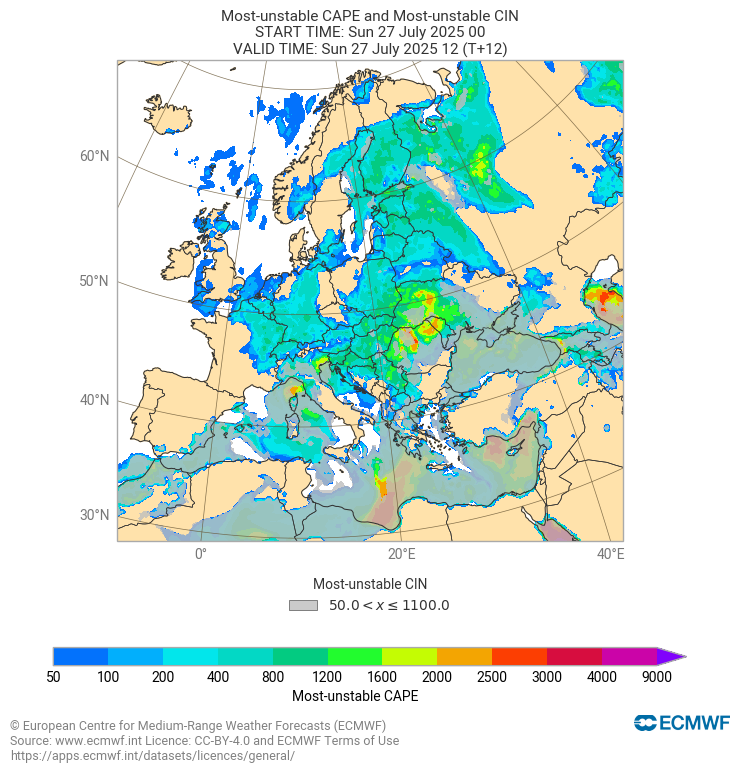

In [50]:
chart = ekp.Map(domain="Europe")

chart.land(color="#ffe2ab")

chart.contourf(mucape, style=cape_style, transform_first=True)
chart.contourf(mucin, style=cin_style, transform_first=True)

chart.legend(label='{variable_name}')

chart.title(
    "{variable_name!0} and {variable_name!1}\n"
    "START TIME: {base_time:%a %d %B %Y %H}\n"
    "VALID TIME: {valid_time:%a %d %B %Y %H} (T+{lead_time})",
    fontsize=11,
)

chart.coastlines(color="#333333")

chart.borders(color="#333333")
chart.gridlines(color="#665433")

chart.add_attribution("© European Centre for Medium-Range Weather Forecasts (ECMWF)\n" 
                      "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use\n"
                      "https://apps.ecmwf.int/datasets/licences/general/")

chart.add_logo("ecmwf")

#chart.show()
chart.save(fname = f'{filename}.png')

In [49]:
r, g, b = 0.8000, 0.3309, 0.2000
hex_colour = '#{:02x}{:02x}{:02x}'.format(int(r*255), int(g*255), int(b*255))
hex_colour

'#cc5433'

Note that plot produced using this dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
The data used here is on 0.25x0.25 resolution, while high resolution data is 0.1x0.1 grid.